In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np # linear algebra
import pandas as pd
# from tqdm import tqdm
from tqdm import tqdm_notebook as tqdm
from datetime import date
# tqdm.pandas()
from multiprocessing import Pool
from functools import partial
import Cluster_feature_function as func
import pickle

In [2]:
data = pd.read_csv('D:\\庫存健診開發\\data\\processed\\TWSE_stock_processed.csv', converters={'ts': str, 'StockNo': str, 'StockName': str})
data['ts'] = pd.to_datetime(data['ts'])
data

,ts,StockNo,StockName,open,high,low,close,vol,total,capital,...,index_close,index_vol,industry_open,industry_high,industry_low,industry_close,industry_vol,foreign_buy,investment_buy,dealer_buy
0,2007-07-02,1101,台泥,16.68,16.68,16.15,16.37,10222.0,381140.0,1202.8,...,8939.49,5490199.0,125.08,125.09,122.87,124.56,44467.0,-3917.0,-765.0,158.0
1,2007-07-03,1101,台泥,16.46,16.50,16.18,16.33,9831.0,367582.0,1199.6,...,8996.20,6604477.0,124.69,125.49,123.77,124.54,76827.0,-1035.0,0.0,1255.0
2,2007-07-04,1101,台泥,16.37,16.77,16.31,16.46,11124.0,420368.0,1209.2,...,9068.98,7261940.0,124.83,127.13,124.56,125.13,48887.0,1057.0,680.0,198.0
3,2007-07-05,1101,台泥,16.46,16.59,16.15,16.15,15043.0,559331.0,1186.7,...,9148.78,7065444.0,125.46,125.46,122.82,123.23,55899.0,-8619.0,601.0,74.0
4,2007-07-06,1101,台泥,16.15,16.87,16.04,16.83,25514.0,959258.0,1236.5,...,9188.31,7514284.0,122.77,125.91,121.95,125.67,103863.0,5288.0,1485.0,1155.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2369242,2019-09-17,9958,世紀鋼,78.59,78.59,76.80,77.00,3050.0,237191.0,161.8,...,10874.50,4238581.0,102.59,102.71,101.54,101.55,31349.0,508.0,0.0,-358.0
2369243,2019-09-18,9958,世紀鋼,77.90,79.30,77.50,77.70,5940.0,464879.0,162.6,...,10929.45,4380466.0,101.42,102.19,101.42,101.80,33530.0,-291.0,0.0,144.0
2369244,2019-09-19,9958,世紀鋼,78.40,78.40,76.20,76.30,4011.0,308696.0,159.7,...,10894.70,4094710.0,101.80,102.03,101.31,101.59,22747.0,64.0,0.0,-161.0
2369245,2019-09-20,9958,世紀鋼,76.60,77.00,75.80,75.80,1742.0,132881.0,158.6,...,10929.69,4712806.0,101.46,102.10,101.33,102.10,55930.0,144.0,0.0,21.0


In [3]:
data_train = data[data['ts'].dt.date < date(2017,9,1)]
data_train = data_train[data_train.capital != 0]
df_list = [group[1] for group in data_train.groupby(data_train['StockNo'])]

output_list = []

if __name__ == '__main__':
    with Pool(processes=12) as pool:
        for i, x in enumerate(tqdm(pool.imap_unordered(partial(func.get_cluster_feature, decay=0.998), df_list), total=len(df_list)), 1):
            output_list.append(x)
    
data_train = pd.concat(output_list, axis=1).transpose()
data_train.columns = ['total_mean', 'price_ATR', 'capital']
data_train

,total_mean,price_ATR,capital
1102,133237.077925,0.017717,1093.864311
1101,281539.504069,0.019620,1338.209009
1203,3584.645286,0.013318,52.865304
1213,2183.726954,0.020765,9.521957
1103,7938.037928,0.017222,105.419716
...,...,...,...
9944,9017.481058,0.028750,27.341360
9946,7519.347520,0.022359,41.955314
9945,191871.215212,0.020425,467.001260
9958,3706.499125,0.017489,16.909855


In [4]:
data_test = data[data['ts'].dt.date >= date(2017,9,1)]
data_test = data_test[data_test.capital != 0]
df_list = [group[1] for group in data_test.groupby(data_test['StockNo'])]

output_list = []

if __name__ == '__main__':
    with Pool(processes=12) as pool:
        for i, x in enumerate(tqdm(pool.imap_unordered(partial(func.get_cluster_feature, decay=1), df_list), total=len(df_list)), 1):
            output_list.append(x)
    
data_test = pd.concat(output_list, axis=1).transpose()
data_test.columns = ['total_mean', 'price_ATR', 'capital']
data_test

,total_mean,price_ATR,capital
1102,295460.180198,0.020711,1169.703443
1110,865.437376,0.011717,86.077230
1104,5693.172277,0.009162,137.087518
1201,50821.033663,0.022669,117.382334
1215,86643.180198,0.020246,162.483234
...,...,...,...
9945,106798.544177,0.015796,494.510152
9946,12794.407921,0.023815,40.282256
9943,13710.184524,0.008877,85.805220
9958,454151.714851,0.049216,103.639530


In [5]:
data_test.isna().values.any()

False

In [6]:
display(data_train.max())
display(data_test.max())
display(data_train.min())
display(data_test.min())

total_mean    5.045142e+06
price_ATR     6.108151e-02
capital       3.045716e+04
dtype: float64

total_mean    7.752856e+06
price_ATR     5.855187e-02
capital       6.165049e+04
dtype: float64

total_mean    134.292101
price_ATR       0.008721
capital         3.886782
dtype: float64

total_mean    73.264865
price_ATR      0.005330
capital        3.245087
dtype: float64

In [6]:
big_capital = data_train[data_train['capital'] > data_train.quantile(0.8)['capital']]
middle_capital = data_train[data_train['capital'] > data_train.quantile(0.2)['capital']][data_train['capital'] < data_train.quantile(0.8)['capital']]
small_capital = data_train[data_train['capital'] < data_train.quantile(0.2)['capital']]

C:\Users\011553\AppData\Local\Continuum\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


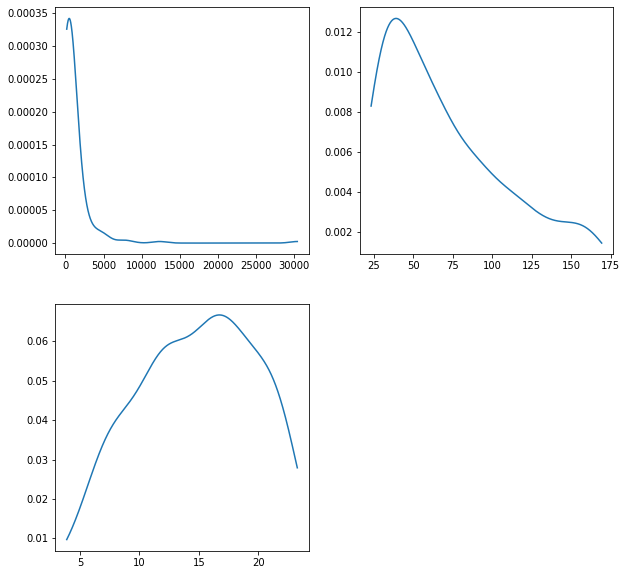

In [13]:
from scipy.stats import gaussian_kde
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
density1 = gaussian_kde(big_capital['capital'])
xs = np.linspace(big_capital['capital'].min(), big_capital['capital'].max(), 100000)
plt.plot(xs,density1(xs))
plt.subplot(2,2,2)
density1 = gaussian_kde(middle_capital['capital'])
xs = np.linspace(middle_capital['capital'].min(), middle_capital['capital'].max(), 100000)
plt.plot(xs,density1(xs))
plt.subplot(2,2,3)
density1 = gaussian_kde(small_capital['capital'])
xs = np.linspace(small_capital['capital'].min(), small_capital['capital'].max(), 100000)
plt.plot(xs,density1(xs))

C:\Users\011553\AppData\Local\Continuum\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


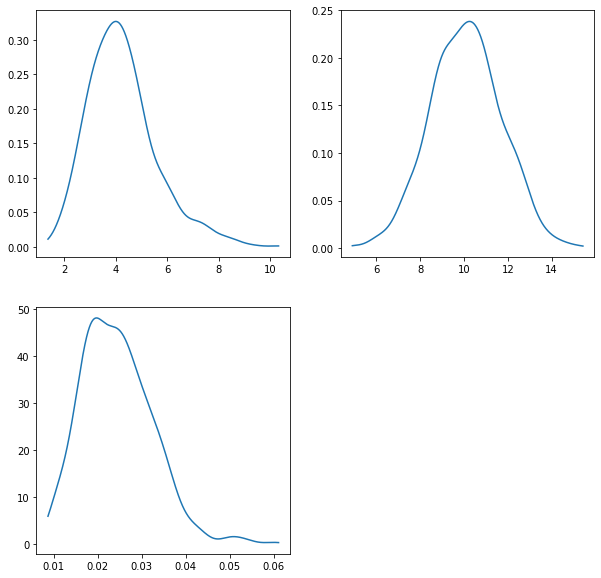

In [14]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.subplot(2,2,1)
density1 = gaussian_kde(np.log(data_train['capital']))
xs = np.linspace(np.log(data_train['capital']).min(), np.log(data_train['capital']).max(), 100000)
plt.plot(xs,density1(xs))
plt.subplot(2,2,2)
density1 = gaussian_kde(np.log(data_train['total_mean']))
xs = np.linspace(np.log(data_train['total_mean']).min(), np.log(data_train['total_mean']).max(), 100000)
plt.plot(xs,density1(xs))
plt.subplot(2,2,3)
density1 = gaussian_kde(data_train['price_ATR'])
xs = np.linspace(data_train['price_ATR'].min(), data_train['price_ATR'].max(), 100000)
plt.plot(xs,density1(xs))

C:\Users\011553\AppData\Local\Continuum\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


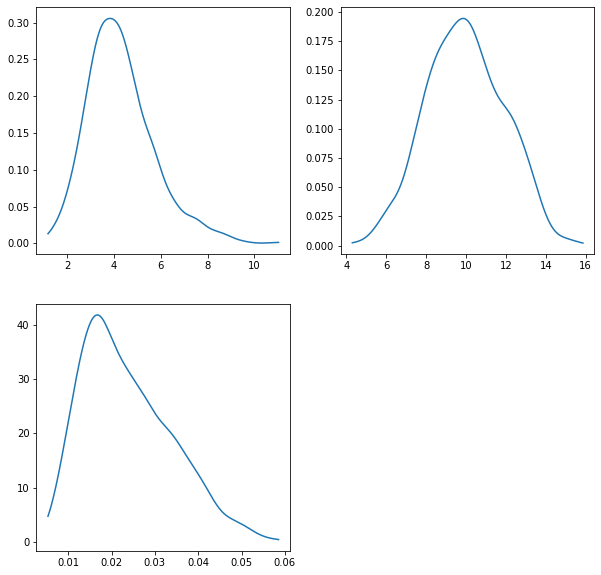

In [15]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.subplot(2,2,1)
density1 = gaussian_kde(np.log(data_test['capital']))
xs = np.linspace(np.log(data_test['capital']).min(), np.log(data_test['capital']).max(), 100000)
plt.plot(xs,density1(xs))
plt.subplot(2,2,2)
density1 = gaussian_kde(np.log(data_test['total_mean']))
xs = np.linspace(np.log(data_test['total_mean']).min(), np.log(data_test['total_mean']).max(), 100000)
plt.plot(xs,density1(xs))
plt.subplot(2,2,3)
density1 = gaussian_kde(data_test['price_ATR'])
xs = np.linspace(data_test['price_ATR'].min(), data_test['price_ATR'].max(), 100000)
plt.plot(xs,density1(xs))

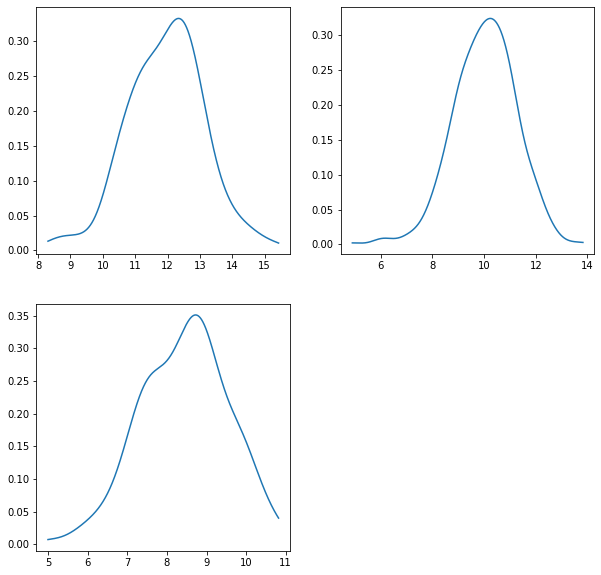

In [16]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
density1 = gaussian_kde(np.log(big_capital['total_mean']))
xs = np.linspace(np.log(big_capital['total_mean']).min(), np.log(big_capital['total_mean']).max(), 100000)
plt.plot(xs,density1(xs))
plt.subplot(2,2,2)
density1 = gaussian_kde(np.log(middle_capital['total_mean']))
xs = np.linspace(np.log(middle_capital['total_mean']).min(), np.log(middle_capital['total_mean']).max(), 100000)
plt.plot(xs,density1(xs))
plt.subplot(2,2,3)
density1 = gaussian_kde(np.log(small_capital['total_mean']))
xs = np.linspace(np.log(small_capital['total_mean']).min(), np.log(small_capital['total_mean']).max(), 100000)
plt.plot(xs,density1(xs))

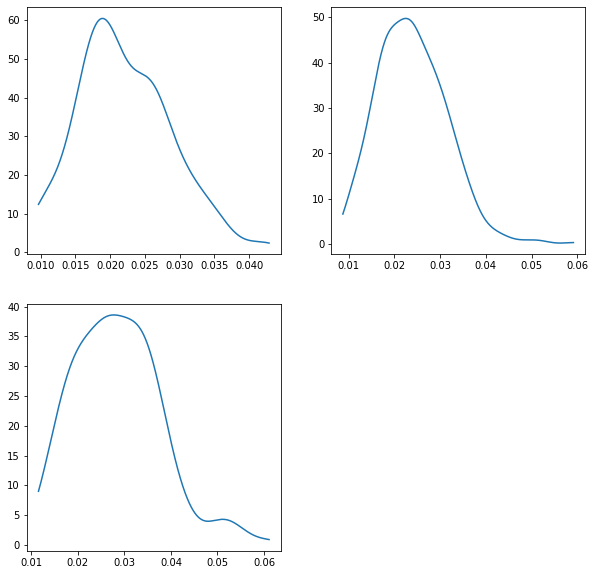

In [17]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
density1 = gaussian_kde(big_capital['price_ATR'])
xs = np.linspace(big_capital['price_ATR'].min(), big_capital['price_ATR'].max(), 100000)
plt.plot(xs,density1(xs))
plt.subplot(2,2,2)
density1 = gaussian_kde(middle_capital['price_ATR'])
xs = np.linspace(middle_capital['price_ATR'].min(), middle_capital['price_ATR'].max(), 100000)
plt.plot(xs,density1(xs))
plt.subplot(2,2,3)
density1 = gaussian_kde(small_capital['price_ATR'])
xs = np.linspace(small_capital['price_ATR'].min(), small_capital['price_ATR'].max(), 100000)
plt.plot(xs,density1(xs))

In [7]:
d1_train = pd.concat([np.log(data_train[['total_mean', 'capital']]), data_train['price_ATR']], axis=1)
d1_test = pd.concat([np.log(data_test[['total_mean', 'capital']]), data_test['price_ATR']], axis=1)

In [8]:
df_train = func.Normalize(d1_train, scaler='standardize')
df_test = func.Normalize(d1_test, scaler='standardize')
display(df_train)
display(df_test)

,total_mean,capital,price_ATR
1102,1.047527,2.045229,-0.834192
1101,1.507490,2.195240,-0.598795
1203,-1.175287,-0.209020,-1.378616
1213,-1.480001,-1.484420,-0.457063
1103,-0.686512,0.304521,-0.895498
...,...,...,...
9944,-0.608124,-0.699602,0.530931
9946,-0.719826,-0.380999,-0.259881
9945,1.271743,1.411943,-0.499182
9958,-1.154735,-1.057119,-0.862470


,total_mean,capital,price_ATR
1102,1.350721,1.953558,-0.287704
1110,-1.641157,0.122145,-1.169364
1104,-0.674928,0.448786,-1.419868
1201,0.447871,0.339865,-0.095768
1215,0.721507,0.568076,-0.333303
...,...,...,...
9945,0.828781,1.349275,-0.769589
9946,-0.259598,-0.410824,0.016561
9943,-0.224139,0.119923,-1.447839
9958,1.571223,0.252467,2.506616


In [9]:
display(df_train.corr())
display(df_test.corr())

,total_mean,capital,price_ATR
total_mean,1.00000,0.785070,0.139980
capital,0.78507,1.000000,-0.244805
price_ATR,0.13998,-0.244805,1.000000


,total_mean,capital,price_ATR
total_mean,1.000000,0.749227,0.403096
capital,0.749227,1.000000,-0.106952
price_ATR,0.403096,-0.106952,1.000000


C:\Users\011553\AppData\Local\Continuum\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


NameError: name 'gaussian_kde' is not defined

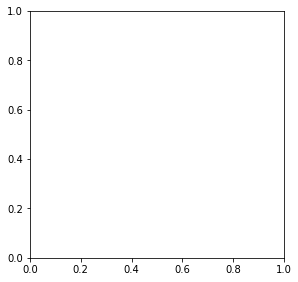

In [10]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.subplot(2,2,1)
density1 = gaussian_kde(df_train['capital'])
xs = np.linspace(df_train['capital'].min(), df_train['capital'].max(), 100000)
plt.plot(xs,density1(xs))
plt.subplot(2,2,2)
density1 = gaussian_kde(df_train['total_mean'])
xs = np.linspace(df_train['total_mean'].min(), df_train['total_mean'].max(), 100000)
plt.plot(xs,density1(xs))
plt.subplot(2,2,3)
density1 = gaussian_kde(df_train['price_ATR'])
xs = np.linspace(df_train['price_ATR'].min(), df_train['price_ATR'].max(), 100000)
plt.plot(xs,density1(xs))

C:\Users\011553\AppData\Local\Continuum\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


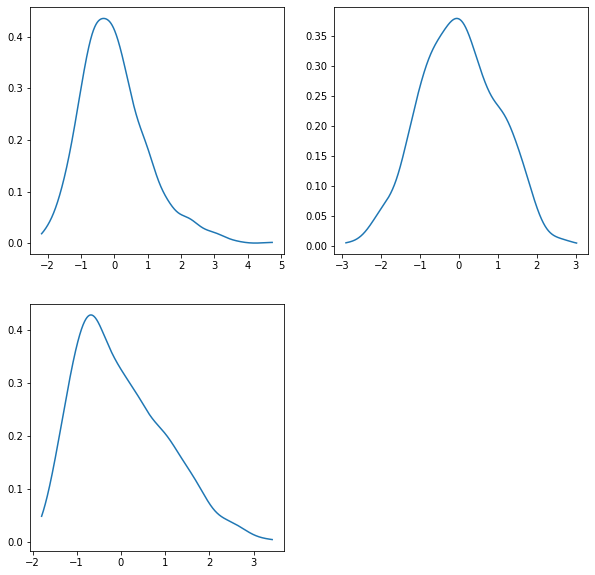

In [22]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.subplot(2,2,1)
density1 = gaussian_kde(df_test['capital'])
xs = np.linspace(df_test['capital'].min(), df_test['capital'].max(), 100000)
plt.plot(xs,density1(xs))
plt.subplot(2,2,2)
density1 = gaussian_kde(df_test['total_mean'])
xs = np.linspace(df_test['total_mean'].min(), df_test['total_mean'].max(), 100000)
plt.plot(xs,density1(xs))
plt.subplot(2,2,3)
density1 = gaussian_kde(df_test['price_ATR'])
xs = np.linspace(df_test['price_ATR'].min(), df_test['price_ATR'].max(), 100000)
plt.plot(xs,density1(xs))

Text(0.5, 0, 'Capital')

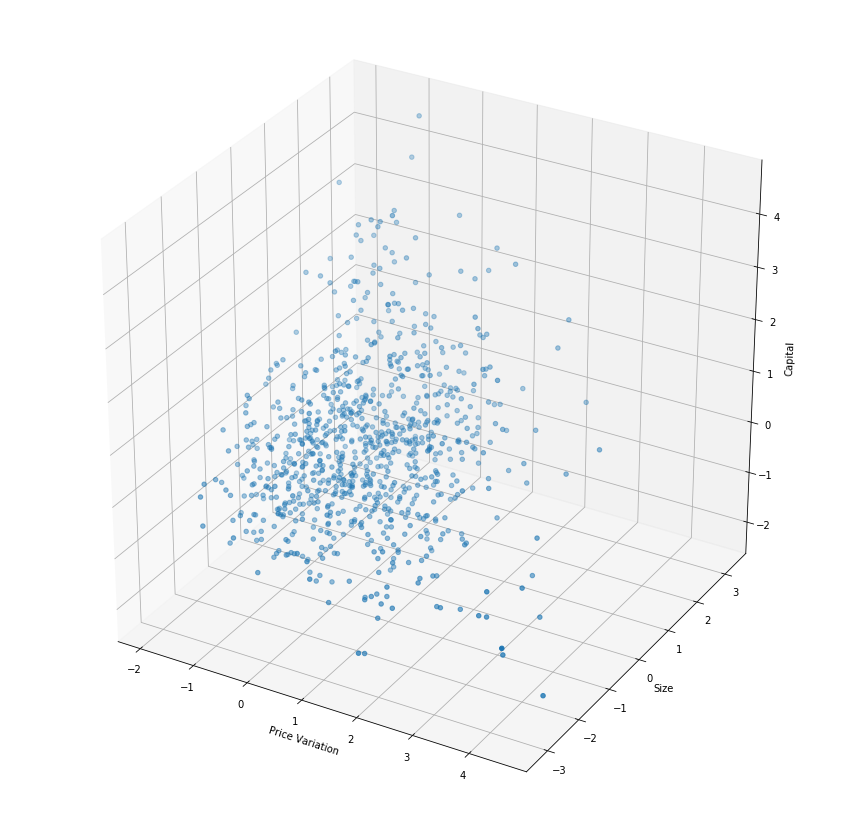

In [11]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection='3d')
ax.scatter3D(df_train['price_ATR'], df_train['total_mean'], df_train['capital'])
ax.set_xlabel('Price Variation')
ax.set_ylabel('Size')
ax.set_zlabel('Capital')

Text(0.5, 0, 'Capital')

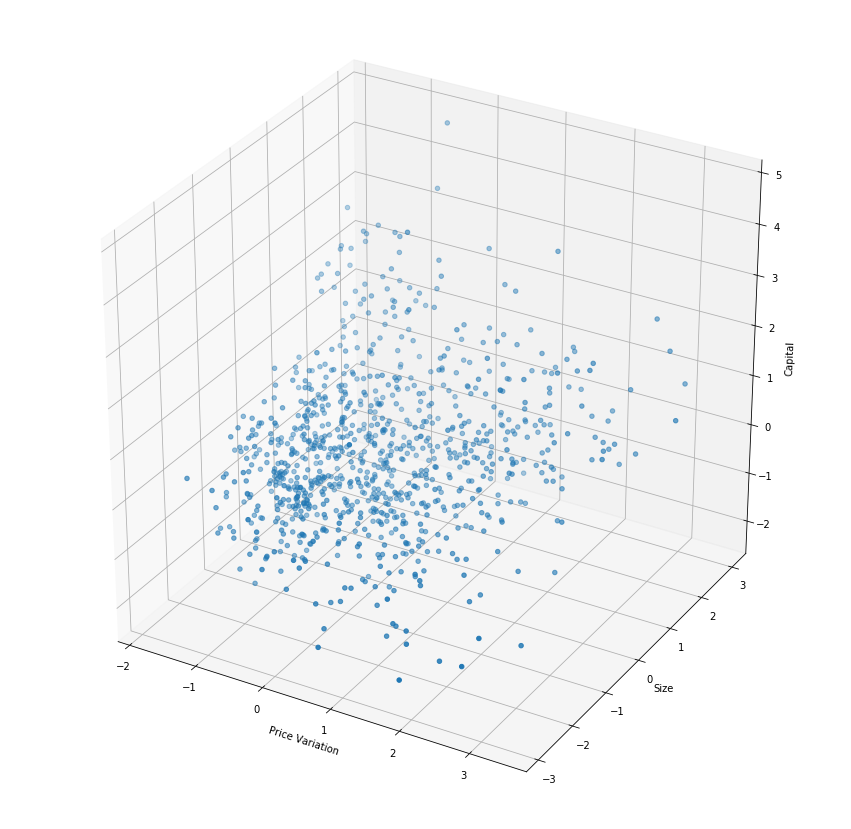

In [12]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection='3d')
ax.scatter3D(df_test['price_ATR'], df_test['total_mean'], df_test['capital'])
ax.set_xlabel('Price Variation')
ax.set_ylabel('Size')
ax.set_zlabel('Capital')

In [13]:
big_train = df_train[df_train['total_mean'] > df_train['total_mean'].quantile(0.4)]
small_train = df_train[df_train['total_mean'] <= df_train['total_mean'].quantile(0.4)]

In [14]:
clusters = [i for i in range(2, 31)]
Kmedians_Result, Kmedians_metrics, K_medians = func.Cluster(df_train, method='Kmedians', cluster_list=clusters)
Kmeans_Result, Kmeans_metrics, K_means = func.Cluster(df_train, method='Kmeans', cluster_list=clusters)
Kmedians_Result_big, Kmedians_metrics_big, K_medians_big = func.Cluster(big_train, method='Kmedians', cluster_list=clusters)
Kmeans_Result_big, Kmeans_metrics_big, K_means_big = func.Cluster(big_train, method='Kmeans', cluster_list=clusters)
Kmedians_Result_small, Kmedians_metrics_small, K_medians_small = func.Cluster(small_train, method='Kmedians', cluster_list=clusters)
Kmeans_Result_small, Kmeans_metrics_small, K_means_small = func.Cluster(small_train, method='Kmeans', cluster_list=clusters)

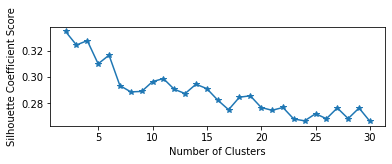

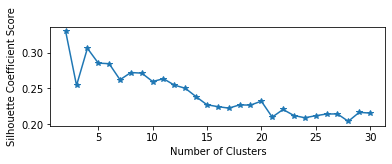

In [15]:
plt.figure()
plt.subplot(2,1,1)
plt.plot(clusters, Kmeans_metrics, '*-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient Score')
plt.show() 
plt.subplot(2,1,2)
plt.plot(clusters, Kmedians_metrics, '*-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient Score')
plt.show() 

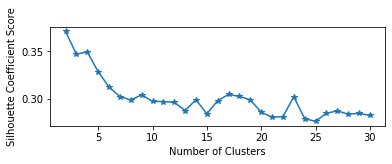

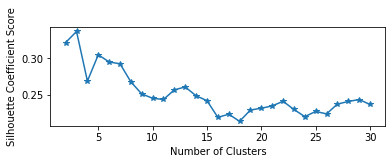

In [16]:
plt.figure()
plt.subplot(2,1,1)
plt.plot(clusters, Kmeans_metrics_big, '*-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient Score')
plt.show() 
plt.subplot(2,1,2)
plt.plot(clusters, Kmedians_metrics_big, '*-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient Score')
plt.show() 

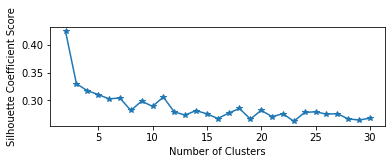

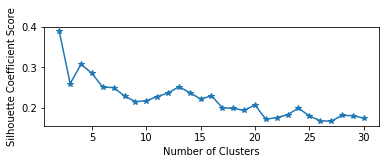

In [17]:
plt.figure()
plt.subplot(2,1,1)
plt.plot(clusters, Kmeans_metrics_small, '*-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient Score')
plt.show() 
plt.subplot(2,1,2)
plt.plot(clusters, Kmedians_metrics_small, '*-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient Score')
plt.show() 

In [18]:
display(Kmedians_Result.groupby(Kmedians_Result['7']).size())
display(Kmedians_Result_big.groupby(Kmedians_Result_big['5']).size())
display(Kmedians_Result_small.groupby(Kmedians_Result_small['4']).size())
display(Kmeans_Result.groupby(Kmeans_Result['7']).size())
display(Kmeans_Result.groupby(Kmeans_Result_big['4']).size())
display(Kmeans_Result.groupby(Kmeans_Result_small['5']).size())

7
0    104
1    153
2    112
3    140
4    151
5    136
6     87
dtype: int64

5
0     96
1    138
2    112
3     66
4    118
dtype: int64

4
0    119
1     56
2    106
3     72
dtype: int64

7
0    122
1    202
2    160
3    148
4    133
5     51
6     67
dtype: int64

4
0.0    160
1.0    188
2.0    111
3.0     71
dtype: int64

5
0.0     56
1.0    102
2.0    101
3.0     13
4.0     81
dtype: int64

Text(0.5, 0, 'Capital')

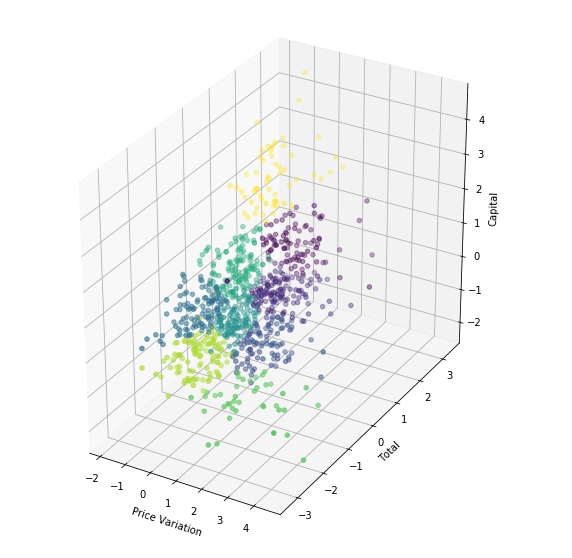

In [19]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([0.7, 1.2, 1, 1]))
ax.scatter3D(df_train['price_ATR'], df_train['total_mean'], df_train['capital'], c=Kmedians_Result['9'])
ax.set_xlabel('Price Variation')
ax.set_ylabel('Total')
ax.set_zlabel('Capital')

Text(0.5, 0, 'Capital')

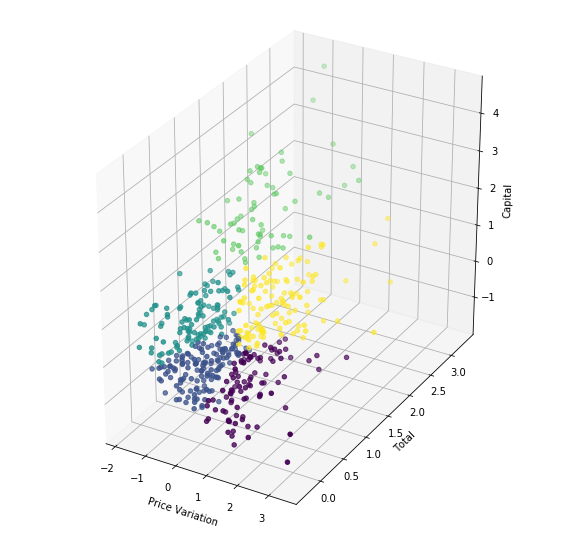

In [20]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([0.7, 1.2, 1, 1]))
ax.scatter3D(big_train['price_ATR'], big_train['total_mean'], big_train['capital'], c=Kmedians_Result_big['5'])
ax.set_xlabel('Price Variation')
ax.set_ylabel('Total')
ax.set_zlabel('Capital')

In [21]:
mean, std = func.ClusterStatistics(Kmedians_Result_big, big_train, 5)
display(mean)
display(std)

,total_mean,capital,price_ATR
Cluster0,0.295787,-0.503906,1.191443
Cluster1,0.136113,-0.163507,-0.100699
Cluster2,0.372711,0.722510,-0.716539
Cluster3,1.710566,2.310835,-0.541183
Cluster4,1.177174,0.678974,0.792786


,total_mean,capital,price_ATR
Cluster0,0.343182,0.443493,0.569522
Cluster1,0.269959,0.305640,0.418946
Cluster2,0.296869,0.374380,0.440505
Cluster3,0.496824,0.631734,0.660261
Cluster4,0.390478,0.471871,0.622668


Text(0.5, 0, 'Capital')

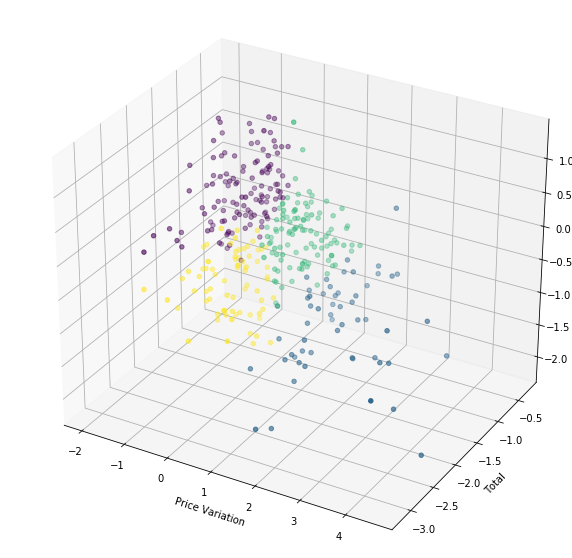

In [22]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([1.2, 1, 1, 1]))
ax.scatter3D(small_train['price_ATR'], small_train['total_mean'], small_train['capital'], c=Kmedians_Result_small['4'])
ax.set_xlabel('Price Variation')
ax.set_ylabel('Total')
ax.set_zlabel('Capital')

In [23]:
mean_small, std_small = func.ClusterStatistics(Kmedians_Result_small, small_train, 4)
display(mean_small)
display(std_small)

,total_mean,capital,price_ATR
Cluster0,-0.783467,-0.141841,-1.143154
Cluster1,-1.332743,-1.359785,1.677170
Cluster2,-0.622786,-0.697888,0.089835
Cluster3,-1.483960,-1.050182,-0.631513


,total_mean,capital,price_ATR
Cluster0,0.389575,0.424571,0.388658
Cluster1,0.666460,0.366065,0.954391
Cluster2,0.256178,0.382556,0.421001
Cluster3,0.437716,0.368047,0.461102


In [24]:
print(Kmedians_Result_big[Kmedians_Result_big['5'] == 3].index.tolist())
print(Kmedians_Result_small[Kmedians_Result_small['4'] == 1].index.tolist())

['1102', '1101', '1216', '1301', '1303', '1326', '1402', '1722', '2002', '2105', '2201', '2207', '2301', '2303', '2308', '2317', '2324', '2330', '2347', '2353', '2354', '2356', '2357', '2382', '2395', '2408', '2409', '2412', '2454', '2474', '2498', '2542', '2633', '2610', '2618', '2801', '2823', '2884', '2882', '2880', '2881', '2883', '2885', '2886', '2887', '2888', '2891', '2892', '2890', '2912', '2915', '3008', '3034', '3045', '3231', '3481', '3702', '4904', '4958', '4938', '5871', '5880', '6239', '6505', '9904', '9945']
['1413', '1418', '1438', '1443', '1456', '1449', '1472', '1471', '1475', '1512', '1516', '1526', '1529', '1538', '1616', '1805', '2025', '2028', '2236', '2305', '2321', '2342', '2358', '2364', '2424', '2429', '2434', '2438', '2440', '2443', '2465', '2491', '2528', '3011', '3025', '3046', '3051', '3229', '3321', '3308', '3432', '3557', '3593', '3701', '5259', '5484', '5906', '6172', '6226', '6225', '6431', '6289', '8033', '8201', '9906', '9928']


In [25]:
centroid_list_big = []
for i in range(len(clusters)):
    centroid_list_big.append(K_medians_big[i].cluster_centers_)
    
centroid_list_small = []
for i in range(len(clusters)):
    centroid_list_small.append(K_medians_small[i].cluster_centers_)
    
display(centroid_list_big[3])
display(centroid_list_small[2])

array([[ 0.2923357 , -0.47055949,  1.10326363],
       [ 0.10237588, -0.10834472, -0.05871871],
       [ 0.37459845,  0.64981718, -0.6419952 ],
       [ 1.6174893 ,  2.26194727, -0.65799417],
       [ 1.15397966,  0.58518549,  0.67736432]])

array([[-0.71750963, -0.20901954, -1.11783791],
       [-1.28068357, -1.34456403,  1.45850812],
       [-0.60898511, -0.71869562,  0.00178312],
       [-1.43588559, -1.04988495, -0.660974  ]])

In [26]:
big_test = df_test[df_test['total_mean'] > df_test['total_mean'].quantile(0.4)]
small_test = df_test[df_test['total_mean'] <= df_test['total_mean'].quantile(0.4)]

In [27]:
Stock = big_test.index.tolist()
output_list = []

if __name__ == '__main__':
    with Pool(processes=12) as pool:
        for i, x in enumerate(tqdm(pool.imap_unordered(partial(func.FindCluster, all_df=big_test, centroid=centroid_list_big[3]), Stock), total=len(Stock)), 1):
            output_list.append(x)
    
cluster_match_big = pd.DataFrame(np.stack(output_list, axis=0), columns=['StockName', 'cluster']).set_index('StockName')
cluster_match_big

,cluster
StockName,
1102,3
1218,1
1256,1
1201,1
1227,2
...,...
9935,0
9946,1
9958,4


In [28]:
Stock = small_test.index.tolist()
output_list = []

if __name__ == '__main__':
    with Pool(processes=12) as pool:
        for i, x in enumerate(tqdm(pool.imap_unordered(partial(func.FindCluster, all_df=small_test, centroid=centroid_list_small[2]), Stock), total=len(Stock)), 1):
            output_list.append(x)
    
cluster_match_small = pd.DataFrame(np.stack(output_list, axis=0), columns=['StockName', 'cluster']).set_index('StockName')
cluster_match_small

,cluster
StockName,
1225,0
1220,3
1231,0
1109,2
1213,3
...,...
9930,0
9931,3
9937,0


In [29]:
print(cluster_match_big.groupby(cluster_match_big['cluster']).size())
print(cluster_match_small.groupby(cluster_match_small['cluster']).size())

cluster
0    110
1    133
2    124
3     62
4    132
dtype: int64
cluster
0    147
1     45
2     90
3     92
dtype: int64


Text(0.5, 0, 'Capital')

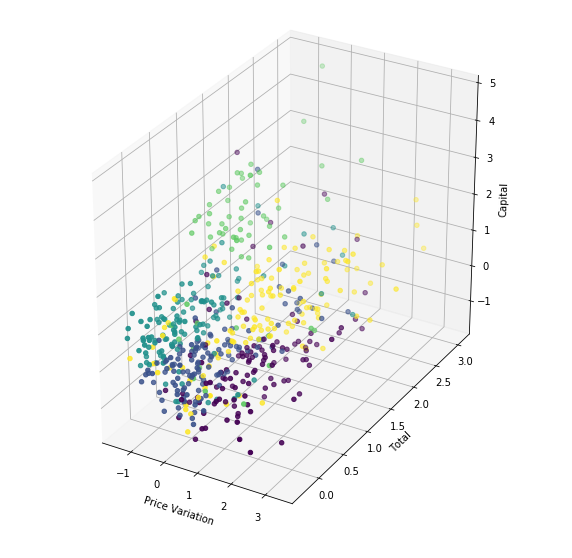

In [30]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([0.7, 1.2, 1, 1]))
ax.scatter3D(big_test['price_ATR'], big_test['total_mean'], big_test['capital'], c=cluster_match_big['cluster'].astype(int))
ax.set_xlabel('Price Variation')
ax.set_ylabel('Total')
ax.set_zlabel('Capital')

Text(0.5, 0, 'Capital')

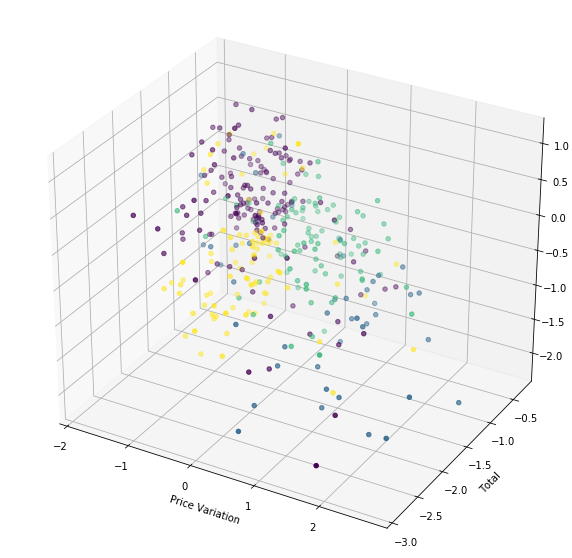

In [31]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([1.2, 1, 1, 1]))
ax.scatter3D(small_test['price_ATR'], small_test['total_mean'], small_test['capital'], c=cluster_match_small['cluster'].astype(int))
ax.set_xlabel('Price Variation')
ax.set_ylabel('Total')
ax.set_zlabel('Capital')

Text(0, 0.5, 'Capital')

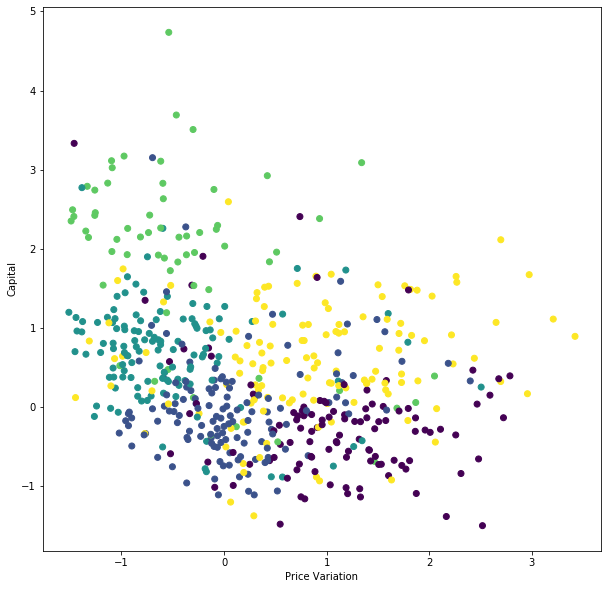

In [32]:
plt.figure(figsize=(10,10))
plt.scatter(big_test['price_ATR'], big_test['capital'], c=cluster_match_big['cluster'].astype(int))
plt.xlabel('Price Variation')
plt.ylabel('Capital')

In [33]:
Kmedians_Result_small['4'] = Kmedians_Result_small['4'] + 5
display(Kmedians_Result_small.groupby(Kmedians_Result_small['4']).size())
cluster_match_small['cluster'] = cluster_match_small['cluster'].astype(int) + 5
display(cluster_match_small.groupby(cluster_match_small['cluster']).size())

4
5    119
6     56
7    106
8     72
dtype: int64

cluster
5    147
6     45
7     90
8     92
dtype: int64

In [34]:
cluster_train = pd.DataFrame(pd.concat([Kmedians_Result_big['5'], Kmedians_Result_small['4']], axis=0), columns=['cluster'])
cluster_test = pd.DataFrame(pd.concat([cluster_match_big['cluster'].astype(int), cluster_match_small['cluster']], axis=0), columns=['cluster'])
display(cluster_train)
display(cluster_test)

,cluster
1102,3
1101,3
1201,2
1215,1
1210,2
...,...
9942,5
9944,7
9946,7
9958,8


,cluster
StockName,
1102,3
1218,1
1256,1
1201,1
1227,2
...,...
9930,5
9931,8
9937,5


In [35]:
display(cluster_train.groupby(cluster_train['cluster']).size())
display(cluster_test.groupby(cluster_test['cluster']).size())

cluster
0     96
1    138
2    112
3     66
4    118
5    119
6     56
7    106
8     72
dtype: int64

cluster
0    110
1    133
2    124
3     62
4    132
5    147
6     45
7     90
8     92
dtype: int64

In [36]:
data_train['cluster'] = cluster_train['cluster']
data_test['cluster'] = cluster_test['cluster']
display(data_train)
display(data_test)

,total_mean,price_ATR,capital,cluster
1102,133237.077925,0.017717,1093.864311,3
1101,281539.504069,0.019620,1338.209009,3
1203,3584.645286,0.013318,52.865304,5
1213,2183.726954,0.020765,9.521957,8
1103,7938.037928,0.017222,105.419716,5
...,...,...,...,...
9944,9017.481058,0.028750,27.341360,7
9946,7519.347520,0.022359,41.955314,7
9945,191871.215212,0.020425,467.001260,3
9958,3706.499125,0.017489,16.909855,8


,total_mean,price_ATR,capital,cluster
1102,295460.180198,0.020711,1169.703443,3
1110,865.437376,0.011717,86.077230,5
1104,5693.172277,0.009162,137.087518,5
1201,50821.033663,0.022669,117.382334,1
1215,86643.180198,0.020246,162.483234,2
...,...,...,...,...
9945,106798.544177,0.015796,494.510152,2
9946,12794.407921,0.023815,40.282256,1
9943,13710.184524,0.008877,85.805220,2
9958,454151.714851,0.049216,103.639530,4


In [37]:
savelist = [centroid_list_big, centroid_list_small]
with open(f'D:\\庫存健診開發\\data\\Clustering\\Cluster_centroid', 'wb') as fp:
    pickle.dump(savelist, fp)

In [38]:
Kmedians_Result_big.to_csv('D:\\庫存健診開發\\data\\Clustering\\Cluster_data_Kmedians_feature_big.csv', index=True)
Kmedians_Result_small.to_csv('D:\\庫存健診開發\\data\\Clustering\\Cluster_data_Kmedians_feature_small.csv', index=True)

In [39]:
data_train.to_csv('D:\\庫存健診開發\\data\\Clustering\\train_cluster.csv')
data_test.to_csv('D:\\庫存健診開發\\data\\Clustering\\test_cluster.csv')

In [360]:
with open('D:\\庫存健診開發\\data\\Clustering\\Cluster_centroid', 'rb') as fp:
    load_list = pickle.load(fp)

In [40]:
d = pd.read_csv('D:\\庫存健診開發\\data\\Clustering\\train_cluster.csv', index_col=0)
d_test = pd.read_csv('D:\\庫存健診開發\\data\\Clustering\\test_cluster.csv', index_col=0)

C:\Users\011553\AppData\Local\Continuum\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Text(0.5, 0, 'Capital')

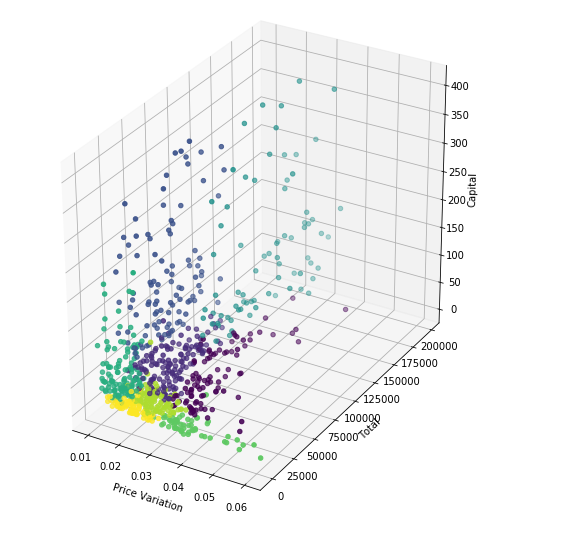

In [41]:
d1 = d[d['capital'] < d['capital'].quantile(0.9)][d['total_mean'] < d['total_mean'].quantile(0.9)]
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([0.7, 1.2, 1, 1]))
ax.scatter3D(d1['price_ATR'], d1['total_mean'], d1['capital'], c=d1['cluster'])
ax.set_xlabel('Price Variation')
ax.set_ylabel('Total')
ax.set_zlabel('Capital')

C:\Users\011553\AppData\Local\Continuum\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Text(0.5, 0, 'Capital')

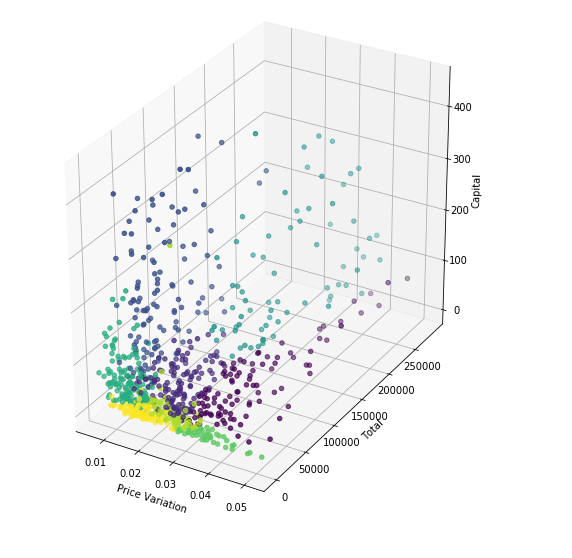

In [42]:
d2 = d_test[d_test['capital'] < d_test['capital'].quantile(0.9)][d_test['total_mean'] < d_test['total_mean'].quantile(0.9)]
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([0.7, 1.2, 1, 1]))
ax.scatter3D(d2['price_ATR'], d2['total_mean'], d2['capital'], c=d2['cluster'])
ax.set_xlabel('Price Variation')
ax.set_ylabel('Total')
ax.set_zlabel('Capital')